# TP4 Ridge, Lasso, CV



### Table of Contents

* [0. Data Preparation ](#chapter0)
* [1. Ridge and Lasso Regression ](#chapter1)
* [2. Cross validation for the hyperparameters $\alpha$ of Ridge and Lasso](#chapter2)




## 0. Data Preparation <a class="anchor" id="chapter0"></a>

We will predict the salary of a baseball player and use the dataset `Hitters`.

Reference : book "James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013".

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd  # dataframes are in pandas 
import matplotlib.pyplot as plt

hitters = pd.read_csv("data/Hitters.csv", index_col="Name")

hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Name,,,,,,,,,,,,,,,,,,,,
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Willie McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
-Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A


**Exercise 1** : 

In `pd.read_csv("Hitters.csv", index_col = "Name") `, what does `index_col = "Name"` mean ? Try without `index_col = "Name"`.



In [5]:
hitters_bis = pd.read_csv("data/Hitters.csv")

hitters_bis

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


Answer for ex. 1 : 


It set the column named `Name` as the main column


**Exercise 2** :

(1)  Sample size of `Hitters` ? How many features in `Hitters` ?

(2)  What are the features in `Hitters` ? 

(3)  Are all the features in $\mathbb{R}$? 

(4)  Are there many missing data ? `print` the number of missing data for each feature. 

- Hint : 
    - (2) et (3) Use `pandas.DataFrame.dtypes`.   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
    - (4) Use `pandas.DataFrame.isnull`.
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
    See the example below. 

In [6]:
# Hint for Question (4) :
ex = pd.DataFrame(dict(nom=['Alice', 'Nicolas', 'Jean'],
                       age=[19, np.NaN, np.NaN],
                       exam=[15, 14, np.NaN]))

print("data : \n", ex)
print("First result : \n", ex.isnull())
print("Second result : \n", ex.isnull().sum())

data : 
        nom   age  exam
0    Alice  19.0  15.0
1  Nicolas   NaN  14.0
2     Jean   NaN   NaN
First result : 
      nom    age   exam
0  False  False  False
1  False   True  False
2  False   True   True
Second result : 
 nom     0
age     2
exam    1
dtype: int64


In [7]:
print(hitters.shape)
print(hitters.columns)
print(hitters.describe())
print(hitters.info())
print(hitters.isnull().sum())

(322, 20)
Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')
            AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   380.928571  101.024845   10.770186   50.909938   48.027950   38.742236   
std    153.404981   46.454741    8.709037   26.024095   26.166895   21.639327   
min     16.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    255.250000   64.000000    4.000000   30.250000   28.000000   22.000000   
50%    379.500000   96.000000    8.000000   48.000000   44.000000   35.000000   
75%    512.000000  137.000000   16.000000   69.000000   64.750000   53.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years       

There are 20 features, all the features are in $\mathbb{R}$. And there are 59 missing values in the column **Salary**

As `Salary` is the **target** we want to predict,  if it is missing for a player,  we will remove this player.

To simplify here, **we only take numeric features**  and ignore factors (i.e. categorical attributes) like  `League`, `Division` and `NewLeague`. 

**Remark :**
To handle the categorical features, one can use one-hot encoding, see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html.

**Exercise 3** :

(1) Remove the players for whom  `Salary` is missing.  

- Hint : use `pandas.DataFrame.dropna`. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html


(2)  `Salary` is the **target**, denoted as `Y` in the next cell.  For the features ( `X` in the next cell, we remove  `League`, `Division` and `NewLeague`.) 

- Hint : (1) You can use  `dtypes == 'int64'` to select the integer-valued  features. Alternative : use `select_dtypes`with `include=number`
    (2) Use `pandas.DataFrame.loc` to access the dataframe. 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [8]:
# We remove the players for whom Salary is missing
hitters.dropna(subset=['Salary'], inplace=True)

X = hitters.select_dtypes(include=int)
Y = hitters['Salary']

# check-point
print(Y.isnull().sum())  # should be 0
print(X.shape)  # should be (322-59, 20-4)=(263,16)

0
(263, 16)


**Exercise 4**
Split the data into a train set and a test set. Use 30% of the data for the test set and a random state = 42. (In the end you can try other values than 42). 

In [9]:
#Answer for Exercise 4
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

**Standardization**
We will standardize the data before applying Lasso or Ridge as is usually advised. For this we use the transformer `StandardScaler`. 

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XtrainScaled = scaler.fit_transform(Xtrain)

Let us check that the columns are now standardized :

In [11]:
XtrainScaled.std(axis=0), XtrainScaled.mean(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 2.41352831e-17,  9.65411326e-18,  1.93082265e-17, -1.20676416e-17,
         1.01368189e-16,  1.61706397e-16,  7.72329061e-17,  6.75787928e-17,
        -1.93082265e-17, -3.86164530e-17,  5.79246795e-17, -3.86164530e-17,
         2.89623398e-17, -3.25826322e-17, -6.75787928e-17,  8.68870193e-17]))

Note that the initial dataframe is now a numpy array :

In [12]:
type(XtrainScaled)

numpy.ndarray

Let us  turn Ytrain into a numpy array as well :

In [13]:
Ytrain = Ytrain.to_numpy()

## 1. Ridge and Lasso <a class="anchor" id="chapter1"></a>

**Ridge**

**Exercise 5** : (1) Create a Ridge regression model. Specify  `fit_intercept=True`, use the default value `alpha=1` and call it `ridge`. Check what alpha corresponds to. 

Hint : Use `sklearn.linear_model.Ridge`.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

(2) Fit `ridge` on the data `(XtrainScaled,Ytrain)`.

(3) Display the estimated coefficients (`intercept` included !). 

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(fit_intercept=True, alpha=1)
ridge.fit(XtrainScaled, Ytrain)

print(ridge.coef_, ridge.intercept_)

[-215.12785148  290.20873256   53.45833136   -7.60173315  -38.54941926
   73.36945017   32.60415669 -323.39710533  116.22147257   26.20493566
  353.14584561  122.1676183  -121.03308298   93.78447846   36.78702805
  -14.33540126] 535.83825


**Exercise 6** : (1) Create a Lasso regression model with `alpha=1` and `fit_intercept=True`, call it `lasso`. What does `alpha` correspond to ?

Hint : use `sklearn.linear_model.Lasso` https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

(2) Fit `lasso` on the data `(XtrainScaled,Ytrain)`.

(3) Display the estimated coefficients. 

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso(fit_intercept=True, alpha=1)
lasso.fit(XtrainScaled, Ytrain)

lasso.coef_

array([-230.44564808,  301.60792783,   40.17406635,  -10.38454116,
        -22.84228549,   70.6672065 ,   40.56803687, -395.18954578,
         36.12817932,   -0.        ,  486.21184889,  170.22079734,
       -133.5656457 ,   94.08801971,   35.12092631,   -8.15322646])


-------------------

In the next exercise, we will display the variation of the Ridge estimator coefficients as a function of the regularization (`alpha`, *shrinkage parameter* ).
Let us generate 50 different values for alpha as follows :

In [16]:
alphas = np.logspace(-4, 6, 50)

*Info about logspace* (if necessary)

In [17]:
np.logspace(0, 3, 4)

array([   1.,   10.,  100., 1000.])

In [18]:
10 ** (np.linspace(0, 3, 4))

array([   1.,   10.,  100., 1000.])

In [19]:
np.logspace(-2, 2, 5) == 10 ** (np.linspace(-2, 2, 5))

array([ True,  True,  True,  True,  True])

[1.00000000e-04 1.59985872e-04 2.55954792e-04 4.09491506e-04
 6.55128557e-04 1.04811313e-03 1.67683294e-03 2.68269580e-03
 4.29193426e-03 6.86648845e-03 1.09854114e-02 1.75751062e-02
 2.81176870e-02 4.49843267e-02 7.19685673e-02 1.15139540e-01
 1.84206997e-01 2.94705170e-01 4.71486636e-01 7.54312006e-01
 1.20679264e+00 1.93069773e+00 3.08884360e+00 4.94171336e+00
 7.90604321e+00 1.26485522e+01 2.02358965e+01 3.23745754e+01
 5.17947468e+01 8.28642773e+01 1.32571137e+02 2.12095089e+02
 3.39322177e+02 5.42867544e+02 8.68511374e+02 1.38949549e+03
 2.22299648e+03 3.55648031e+03 5.68986603e+03 9.10298178e+03
 1.45634848e+04 2.32995181e+04 3.72759372e+04 5.96362332e+04
 9.54095476e+04 1.52641797e+05 2.44205309e+05 3.90693994e+05
 6.25055193e+05 1.00000000e+06]


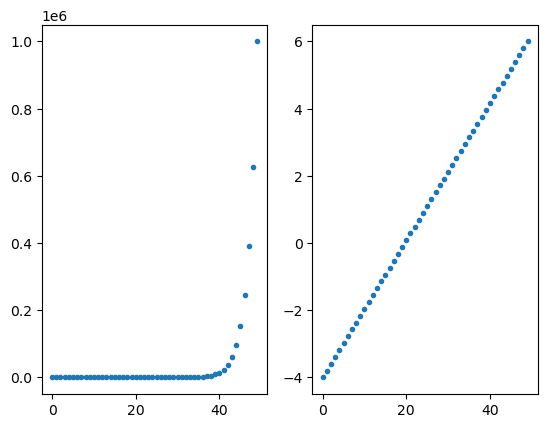

In [20]:
print(alphas)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(alphas, ".")
ax2.plot(np.log10(alphas), ".")

**Exercise 7** : (1) For each  `alpha` in `alpha_s`,  fit a ridge model. 
You can  use `ridge.set_params`. See : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html. 
 

(2) Plot the  coefficients (without the intercept) w.r.t.  `log10(alpha)`. What do you observe ? 

(3) (**Optional** ) Create a linear regression model, compare the coefficients given by the OLS estimator with those you get with a Ridge model with a small  `alpha`. 


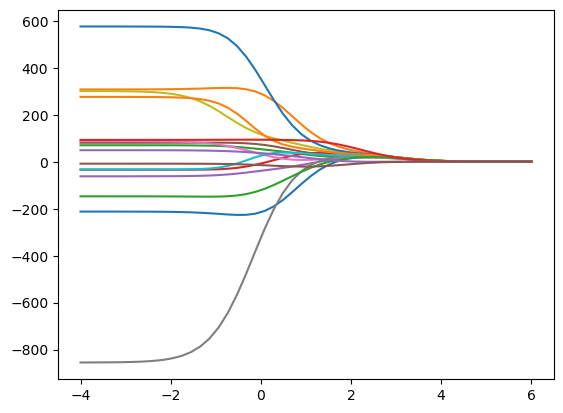

In [21]:
from sklearn.linear_model import LinearRegression

coefs_ridge = []
for alpha in alphas:
    ridge = Ridge(fit_intercept=True, alpha=alpha)
    ridge.fit(XtrainScaled, Ytrain)
    coefs_ridge.append(ridge.coef_)

plt.plot(np.log10(alphas), coefs_ridge)
plt.show()

In [22]:
linReg = LinearRegression(fit_intercept=True)
linReg.fit(XtrainScaled, Ytrain)
print(linReg.coef_)
print(coefs_ridge[0])
coefs_ridge = np.array(coefs_ridge)

[-212.17552979  307.84554012   70.19893491  -33.94121908  -61.98261284
   80.93907097   87.9354101  -854.87222296  301.36091121  -32.55986525
  575.96472518  276.24716079 -147.21083025   92.98658147   49.1730284
   -8.23077394]
[-212.18873763  307.85651187   70.19704929  -33.94181179  -61.97778652
   80.94031337   87.91930611 -854.70162148  301.23727914  -32.56030861
  575.95219431  276.23085108 -147.21581673   92.98728123   49.16991958
   -8.231394  ]


**Lasso**

We will do the same questions as in  Exercise 7 but for Lasso. 

For that, we will use   `sklearn.linear_model.lasso_path`. 
See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html 

Note that the output of `lasso_path` is a  `tuple`. 
You can read this example : https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lasso_lars_elasticnet_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-lasso-lars-elasticnet-path-py

(Also :  note  the shape of the array of  coefficients output by `lasso_path`...)

In [23]:
from sklearn.linear_model import lasso_path

alphas_lasso, coefs_lasso, _ = lasso_path(XtrainScaled, Ytrain, n_alphas=50)
coefs_lasso.shape, coefs_lasso.shape

((16, 50), (16, 50))

(in coefs_ridge the rows corresponded to the different values of alpha and the columns were the features, it is the opposite for the output of `lasso_path`).

We used 50 values for alphas (those values are automatically determined by `lasso_path`). 

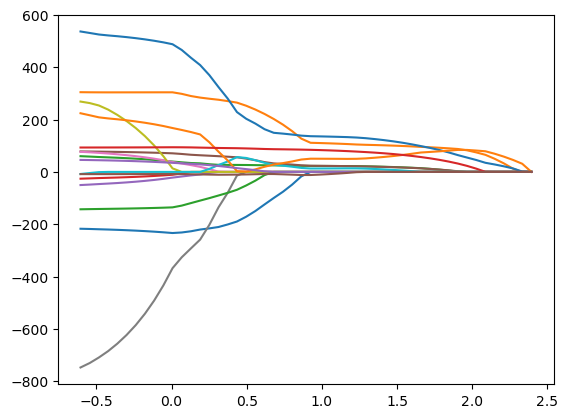

In [24]:
coefs_lasso = coefs_lasso.T
plt.plot(np.log10(alphas_lasso), coefs_lasso)
plt.show()

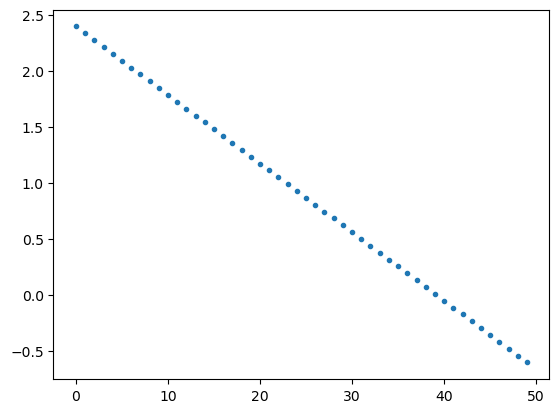

In [25]:
#the values of alphas chosen by defaults are also on a logarithmic scale
plt.plot(np.log10(alphas_lasso), '.')

Text(0, 0.5, 'Lasso coefficients')

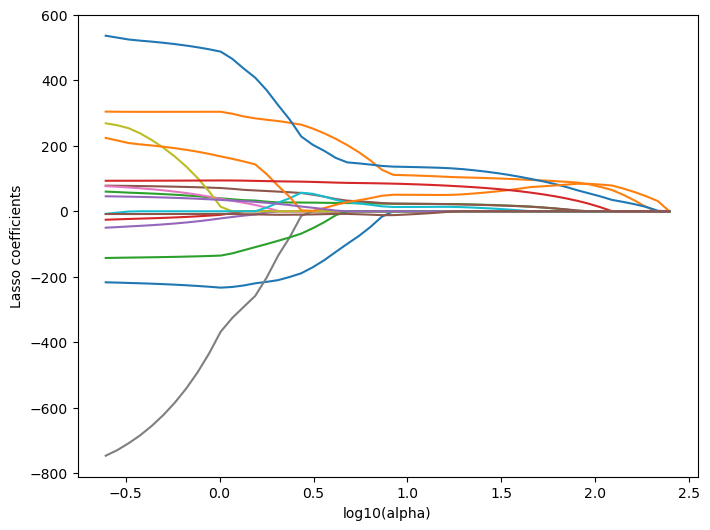

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.log10(alphas_lasso), coefs_lasso)
ax.set_xlabel('log10(alpha)')
ax.set_ylabel('Lasso coefficients')

-------------------

Now let us show that **Lasso will help us select  the features**,  i.e. some coefficients will be set to 0 when  `alpha` increases. 


**Exercise 8** :   Compute the number `nb` of zeros among the **Lasso** coefficients for each  `alpha`. (Hint in the next cell)

Plot `nb` w.r.t. `log10(alphas)`.


In [27]:
ind = np.array([[0, 1, 1], [0, 1, 1], [0, 1, 0]])

print("1.\n", ind)
print("2.\n", ind == 0)
print("3. Le nombre de 0 de chaque colonne est :\n ", (ind == 0).sum(axis=0))
print("4. Le nombre de 0 de chaque ligne est : \n", (ind == 0).sum(axis=1))


1.
 [[0 1 1]
 [0 1 1]
 [0 1 0]]
2.
 [[ True False False]
 [ True False False]
 [ True False  True]]
3. Le nombre de 0 de chaque colonne est :
  [3 0 1]
4. Le nombre de 0 de chaque ligne est : 
 [1 1 2]


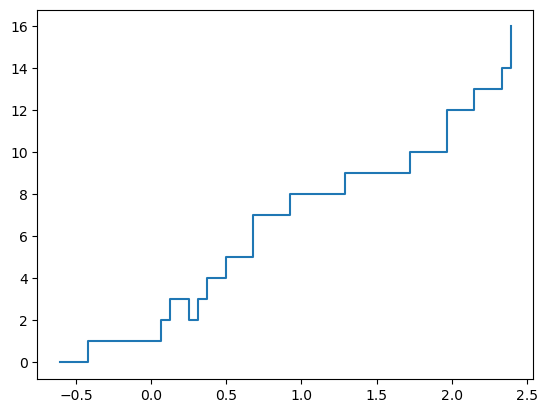

In [28]:
nb_lasso = np.array(coefs_lasso == 0).sum(axis=1)
plt.step(np.log10(alphas_lasso), nb_lasso)
plt.show()

**Exercise 9** :  Compute the number `nb` of  0 among the  **Ridge** coefficients for each `alpha`. 

Plot `nb` w.r.t. `log10(alphas)`.

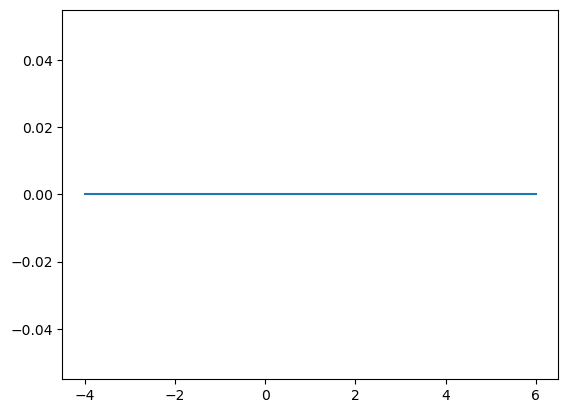

In [29]:
nb_ridge = np.array(coefs_ridge == 0).sum(axis=1)
plt.plot(np.log10(alphas), nb_ridge)
plt.show()

----------------


## 2. Cross Validation for the Lasso and Ridge  hyperparameter $\alpha$   <a class="anchor" id="chapter2"></a>

In the next exercises, we will select an optimal `alpha` among the values in `alpha_s` by cross-validation.

We will use `sklearn.linear_model.RidgeCV` and `sklearn.linear_model.LassoCV`.

Reference :

1. `sklearn.linear_model.RidgeCV` : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

2. `sklearn.linear_model.LassoCV` : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html


In [30]:
alphas = np.logspace(-4, 6, 50)

**Exercise 10** : (1) Create a model for  `RidgeCV`, call it `ridgeCV`, with parameters `alphas=alpha_s`  and `store_cv_values=True`. Fit  `ridgeCV` on  `(XtrainScaled,Ytrain)`. 

Remark : to be completely rigorous, we should have created a pipeline containing the scaler to avoid what we call "data leakage" in the CV calculation. We will ignore this detail here to simplify. 

(2) We have 50 different values for `alpha`. For each  `alpha`, how many  `score`s do we get for the cross-validation ? Read the info concerning the parameter `cv_values_` of `RidgeCV` in https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html 



In [31]:
from sklearn.linear_model import RidgeCV

ridgeCV = RidgeCV(alphas=alphas, store_cv_values=True)
ridgeCV.fit(XtrainScaled, Ytrain)

print(ridgeCV.alphas)

[1.00000000e-04 1.59985872e-04 2.55954792e-04 4.09491506e-04
 6.55128557e-04 1.04811313e-03 1.67683294e-03 2.68269580e-03
 4.29193426e-03 6.86648845e-03 1.09854114e-02 1.75751062e-02
 2.81176870e-02 4.49843267e-02 7.19685673e-02 1.15139540e-01
 1.84206997e-01 2.94705170e-01 4.71486636e-01 7.54312006e-01
 1.20679264e+00 1.93069773e+00 3.08884360e+00 4.94171336e+00
 7.90604321e+00 1.26485522e+01 2.02358965e+01 3.23745754e+01
 5.17947468e+01 8.28642773e+01 1.32571137e+02 2.12095089e+02
 3.39322177e+02 5.42867544e+02 8.68511374e+02 1.38949549e+03
 2.22299648e+03 3.55648031e+03 5.68986603e+03 9.10298178e+03
 1.45634848e+04 2.32995181e+04 3.72759372e+04 5.96362332e+04
 9.54095476e+04 1.52641797e+05 2.44205309e+05 3.90693994e+05
 6.25055193e+05 1.00000000e+06]


**Exercise 11** : For each  alpha, give the mean of the scores, and call it `alpha_score`.

In [32]:
ind2 = np.array([[1, 2, 3], [4, 5, 6]])

print("1\n", ind2.shape)
print("2\n", ind2.mean(axis=0))
print("3\n", ind2.mean(axis=1))

1
 (2, 3)
2
 [2.5 3.5 4.5]
3
 [2. 5.]


In [33]:
alpha_score = np.array(ridgeCV.cv_values_).mean(axis=0)
print(alpha_score)

[113118.88744001 113116.69286852 113113.18556678 113107.58383637
 113098.64598224 113084.40808822 113061.78529489 113025.98539916
 112969.69566328 112882.07537387 112747.79805364 112546.85329372
 112256.56479104 111857.83289663 111346.43126402 110745.49596347
 110109.29600567 109509.30347683 109005.33407911 108617.71404706
 108320.48014704 108060.67952768 107780.11849629 107417.39480475
 106905.47799251 106192.37025218 105279.10514885 104241.95728675
 103226.43288847 102432.84254075 102115.20847976 102611.29155658
 104413.7148642  108209.84634695 114694.63495968 124063.6584143
 135546.04470461 147564.71477358 158507.58752129 167405.12162365
 174048.22918159 178716.25228531 181863.60951865 183928.45859066
 185259.32936241 186107.45677344 186644.07339405 186982.05844378
 187194.33036861 187327.40975748]


**Exercise 12** : Plot `alpha_score` w.r.t. `log10(alpha_s)`. Which `alpha` are we going to choose ? Display the coefficients for the chosen  `alpha`.

Hint : read the attributes `alpha_` and `coef_` of ridgecv.

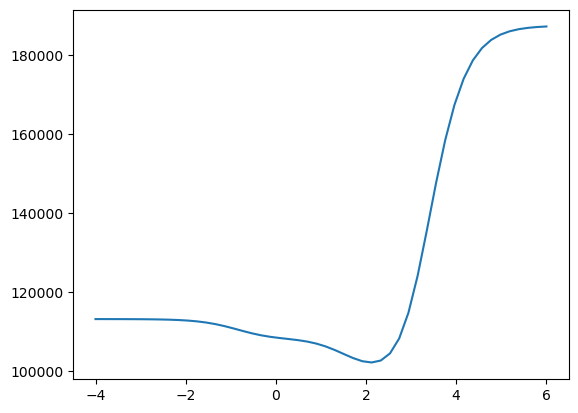

In [34]:
plt.plot(np.log10(alphas), alpha_score)
plt.show()

In [35]:
print("best alpha for ridge : ", ridgeCV.alpha_)
print("ridge coef for the best alpha : ", ridgeCV.coef_)

best alpha for ridge :  132.57113655901108
ridge coef for the best alpha :  [18.60099315 44.83916896 19.65511565 31.2895848  19.53291699 23.82494567
 17.58025351 24.95507189 34.79628953 25.54796552 36.50612186 32.17517034
 17.53213942 56.00516056  0.58648412 -8.49246715]


We will do the same for **Lasso** using `LassoCV`. 

**Remark**  :  By default, `LassoCV` uses 5-fold cross-validation, which is different from *Leave-One-Out Cross-Validation* used in `RidgeCV`. 




In [36]:
from sklearn.linear_model import LassoCV

lassoCV = LassoCV(n_alphas=50)
lassoCV.fit(XtrainScaled, Ytrain)
lassoCV.mse_path_.shape

(50, 5)

"5" corresponds to the 5-folds and "50" corresponds to the 50 values of alpha. Here we let LassoCV choose those 50 values. 

Pay attention to the fact that,  again, the rows and the columns are reversed compared to RidgeCV output : that is why we use the parameter "axis=1" in the next cell. 

NB : the default value for cv is 5 here (using  leave-one-out for Lasso would be too costly (no fast formula, contrary to Ridge)). 

In [37]:
alpha_score = lassoCV.mse_path_.mean(axis=1)
alpha_score.shape

(50,)

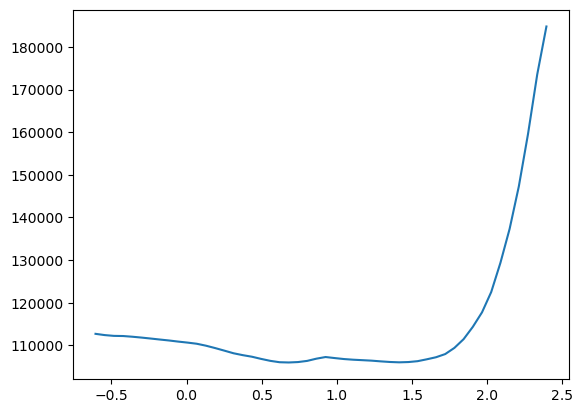

In [38]:
alphas = lassoCV.alphas_
plt.plot(np.log10(alphas), alpha_score)

In [39]:
print("best alpha for lasso : ", lassoCV.alpha_)
print("lasso coef for the best alpha : ", lassoCV.coef_)

best alpha for lasso :  4.783179587705159
lasso coef for the best alpha :  [-99.92030224 202.5757594   25.01239288   0.          -0.
  32.47945631   0.          -0.           0.          27.91148338
 150.0851833   27.07622842  -0.          86.82862045   0.
  -8.03825832]


## OPTIONAL : Comparing estimators

Remark about the standardization : the standardization needs to be  done in three steps : 
- first we use `fit` on the train set, which means  the standardizer computes the mean and the std for each feature in your train set.
- Then you transform the data : it means, for each column, you remove the mean computed before (i.e. the means computed on the **train** set) and divide by the std computed before (i.e. the std computed on the **train** set).
- But pay attention to the fact that  you must transform the train set **and** the test set. But the fit has to be done on the train set  only !

Previously, we used the shorter syntax `fit_transform` that allows you to do the `transform` calculation and then to `fit`. We could do that because we only used the train set. But for the test set, we must only use `transform`. 

In [40]:
XtestScaled = scaler.transform(Xtest)

**Prediction of Salary on the test set using the OLS estimator**

(-47.125, 2529.625, -84.28768799283341, 2492.4623120071665)

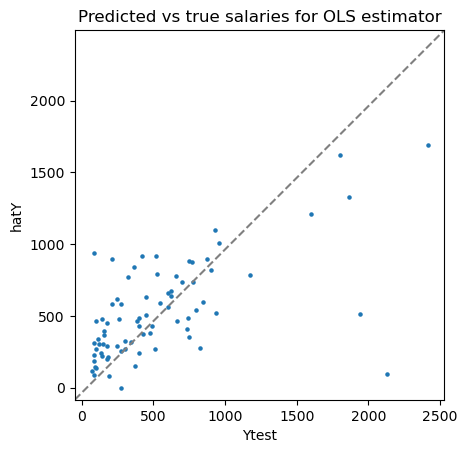

In [41]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(Xtrain,
           Ytrain)  # no need to scale for OLS if you just want to predict (unless the solver works best with scaled data)
# the predictions should not be different with or without standardization (could differ only owing to numerical problems)
hatY_LinReg = linReg.predict(Xtest)

fig, ax = plt.subplots()
ax.scatter(Ytest, hatY_LinReg, s=5)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', c='gray')
ax.set_xlabel('Ytest')
ax.set_ylabel('hatY')
ax.set_title('Predicted vs true salaries for OLS estimator')
ax.axis('square')

**Optional Exercise 1**
Do the same with the Ridge estimator (with alpha chosen by CV). 

(-47.125, 2529.625, -96.55458820082124, 2480.1954117991786)

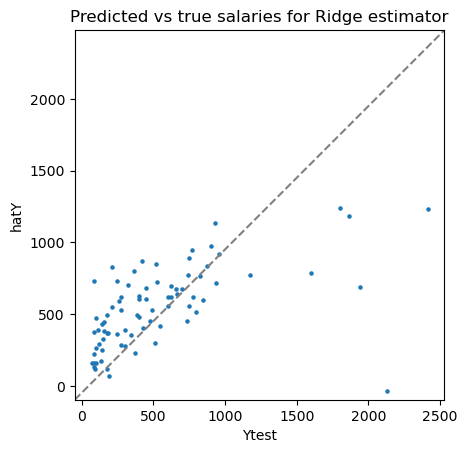

In [42]:
best_ridge = Ridge(fit_intercept=True, alpha=132.57)
best_ridge.fit(XtrainScaled, Ytrain)

hatY_ridge = best_ridge.predict(XtestScaled)

fig, ax = plt.subplots()
ax.scatter(Ytest, hatY_ridge, s=5)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', c='gray')
ax.set_xlabel('Ytest')
ax.set_ylabel('hatY')
ax.set_title('Predicted vs true salaries for Ridge estimator')
ax.axis('square')

**Optional Exercise 2** Do the same with Lasso with alpha chosen by CV. 

(-47.125, 2529.625, -130.82214503665753, 2445.9278549633423)

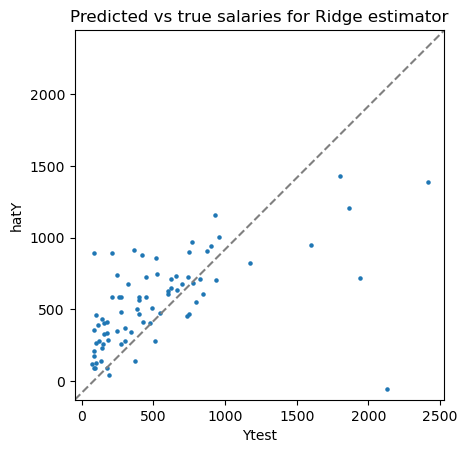

In [43]:
best_lasso = Lasso(fit_intercept=True, alpha=4.78)
best_lasso.fit(XtrainScaled, Ytrain)

hatY_lasso = best_lasso.predict(XtestScaled)

fig, ax = plt.subplots()
ax.scatter(Ytest, hatY_lasso, s=5)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', c='gray')
ax.set_xlabel('Ytest')
ax.set_ylabel('hatY')
ax.set_title('Predicted vs true salaries for Ridge estimator')
ax.axis('square')

**Calculation of the best alpha with a "BIC criterion".**
Here is an alternative method to choose the "best" alpha : 

In [44]:
from sklearn.linear_model import LassoLarsIC

lassoBIC = LassoLarsIC(criterion='bic')
lassoBIC.fit(XtrainScaled, Ytrain)
print("best alpha chosen by BIC criterion :", lassoBIC.alpha_)
print("best alpha chosen by CV :", lassoCV.alpha_)

alpha_BIC = lassoBIC.alpha_

best alpha chosen by BIC criterion : 17.81143051916605
best alpha chosen by CV : 4.783179587705159


**Comparison between predicted salary and true salary for "LassoBIC" estimator :** 

(-47.125, 2529.625, -111.67387145852295, 2465.076128541477)

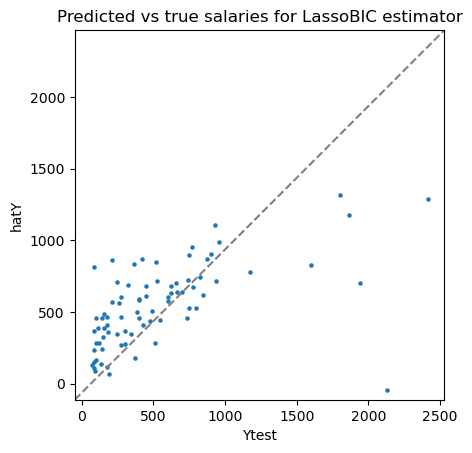

In [45]:
lasso.set_params(alpha=alpha_BIC)
lasso.fit(XtrainScaled, Ytrain)

hatY_BIC = lasso.predict(XtestScaled)

fig, ax = plt.subplots()
ax.scatter(Ytest, hatY_BIC, s=5)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', c='gray')
ax.set_xlabel('Ytest')
ax.set_ylabel('hatY')
ax.set_title('Predicted vs true salaries for LassoBIC estimator')
ax.axis('square')

**Optional Exercise 3** Compute the MSE for these four different estimators (LassoCV, LassoBIC, OLS, RidgeCV)

In [46]:
from sklearn.metrics import mean_squared_error

MSEs = []
for name, estimator in zip(["LassoCV", "LassoBIC", "RidgeCV", "OLS"], [lassoCV, lassoBIC, ridgeCV, linReg]):
    y_pred = estimator.predict(Xtest)
    MSE = mean_squared_error(Ytest, y_pred)
    print(f"MSE for {name} : {MSE}")
    MSEs.append(MSE)

print(np.min(MSEs))

MSE for LassoCV : 8747438999.110947
MSE for LassoBIC : 13652129197.77105
MSE for RidgeCV : 34959235357.83314
MSE for OLS : 150074.5486842358
150074.5486842358


**Optional Exercise 4** Display the boxplot of the absolute errors for each estimator.

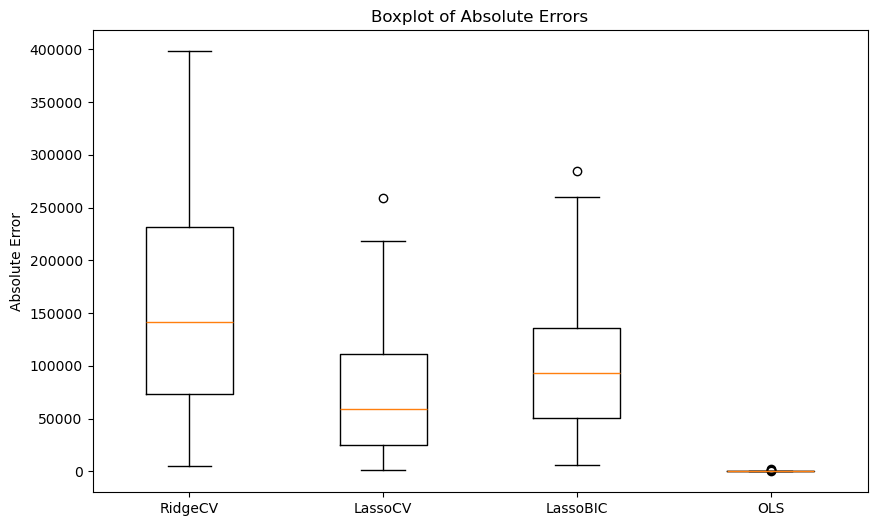

In [47]:
# Boxplot the absolute error for LassoCV, LassoBIC, RidgeCV, OLS
ridge_cv_errors = np.abs(Ytest - ridgeCV.predict(Xtest))
lasso_cv_errors = np.abs(Ytest - lassoCV.predict(Xtest))
lasso_bic_errors = np.abs(Ytest - lassoBIC.predict(Xtest))
ols_errors = np.abs(Ytest - linReg.predict(Xtest))

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([ridge_cv_errors, lasso_cv_errors, lasso_bic_errors, ols_errors],
           labels=['RidgeCV', 'LassoCV', 'LassoBIC', 'OLS'])
ax.set_title('Boxplot of Absolute Errors')
ax.set_ylabel('Absolute Error')
plt.show()

**Optional Exercise 5**
Based on the above information, which estimator would you recommend?

In [48]:
# answer fot Optional Exercise 5